In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from matplotlib import pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


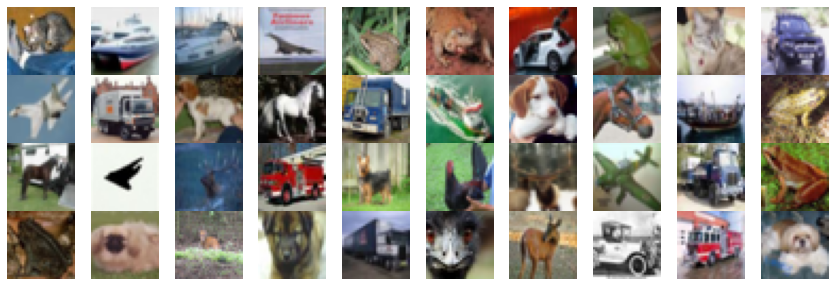

In [ ]:
plt.figure(figsize=(15,5))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(x_test[i].reshape((32,32, 3)),cmap=plt.cm.hsv)
    plt.axis('off')
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model = Sequential([
 Flatten(input_shape=(32, 32, 3)),
 Dense(256, activation='relu'),
 Dense(128, activation='relu', kernel_initializer='he_uniform'),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15, batch_size=64)

Epoch 1/15
782/782 [==============================] - 9s 11ms/step - loss: 1.8836 - accuracy: 0.3182 - val_loss: 1.7506 - val_accuracy: 0.3768
Epoch 2/15
782/782 [==============================] - 8s 11ms/step - loss: 1.6965 - accuracy: 0.3940 - val_loss: 1.6329 - val_accuracy: 0.4182
Epoch 3/15
782/782 [==============================] - 8s 11ms/step - loss: 1.6147 - accuracy: 0.4228 - val_loss: 1.6072 - val_accuracy: 0.4298
Epoch 4/15
782/782 [==============================] - 8s 11ms/step - loss: 1.5616 - accuracy: 0.4404 - val_loss: 1.6233 - val_accuracy: 0.4235
Epoch 5/15
782/782 [==============================] - 8s 11ms/step - loss: 1.5282 - accuracy: 0.4542 - val_loss: 1.5604 - val_accuracy: 0.4447
Epoch 6/15
782/782 [==============================] - 8s 11ms/step - loss: 1.4921 - accuracy: 0.4655 - val_loss: 1.5720 - val_accuracy: 0.4347
Epoch 7/15
782/782 [==============================] - 8s 11ms/step - loss: 1.4652 - accuracy: 0.4763 - val_loss: 1.4875 - val_accuracy: 0.4736

In [ ]:
#Analyzing the model accuracy - Test Accuracy 
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy:', test_acc*100)

313/313 - 1s - loss: 1.4387 - accuracy: 0.4930
Test accuracy: 49.300000071525574


In [ ]:
#Train Accuracy
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train accuracy:', train_acc*100)

1563/1563 - 5s - loss: 1.2965 - accuracy: 0.5380
Train accuracy: 53.79599928855896


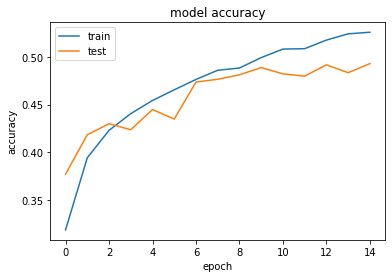

In [ ]:
#Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

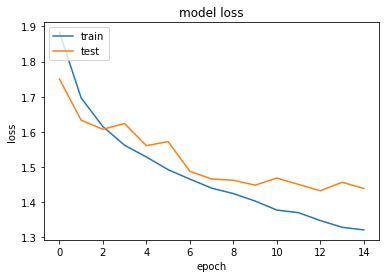

In [ ]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.save('cifar.h5')